In [ ]:
#crop and paste and image

In [37]:
import tifffile as tiff
from natsort import natsorted
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cv2
from imutils.src import imfunctions #contours_length as imutils.contours_length
from natsort import natsorted
import shutil
import pandas as pd

In [11]:
img_path='2020-07-01_17-32-12_control_worm4-channel-0-bigtiff_img017777.tif'
img=tiff.imread(img_path)

In [29]:
#median Blur
img=cv2.medianBlur(img,5)

#apply threshold
ret, new_img = cv2.threshold(img,20,255,cv2.THRESH_BINARY)
#get some contours
worm_contour_img=imfunctions.draw_some_contours(new_img,contour_size=8000,tolerance=0.25, inner_contour_area_to_fill=300)

In [66]:
#find external contours on the binary image
_,cnts,hierarchy=cv2.findContours(worm_contour_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#draw them
print(len(cnts))
#loop through contours
coordinates_dict={'x',
                 'y',
                 'width',
                 'height'}

for cnt_idx,cnt in enumerate(cnts):
    #create an empty image equal to the source
    #cnt_img=np.zeros(shape=img.shape)
    #draw the contours on it
    cv2.drawContours(cnt_img, cnts, np.array(cnt_idx),0,-1)
    #get the boundingrectangle of the contour
    x,y,w,h = cv2.boundingRect(cnt)
    
    cnt_img=cnt_img[y:y+h,x:x+w]
    tiff.imwrite(img_path+str(cnt_idx),cnt_img)
# cnt_img2=np.zeros(shape=img.shape)
# cnt_img2[y:y+h,x:x+w]=cnt_img
# plt.imshow(cnt_img2)
# plt.show()
    coordinates_dict={'x': [x],
                     'y': [y],
                     'width': [w],
                     'height': [h]}
df=pd.DataFrame(coordinates_dict)
df.head(1)
df.to_csv('coordinates_img.csv')
tiff.imwrite('img.tif',cnt_img2)


2


In [67]:
df

,x,y,width,height
0,195,68,289,138


(-0.5, 607.5, 609.5, -0.5)

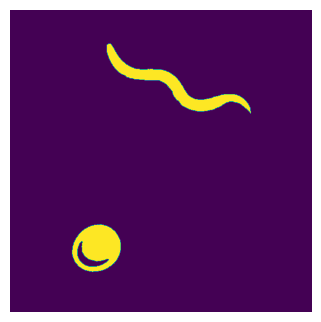

In [17]:
plt.figure(dpi=100)
plt.imshow(worm_contour_img)
plt.axis('off')